##개요

'핸즈 온 머신러닝' 2판 10.2장(372p)을 공부하면서 스케일 조정이 왜 필요할까에 대한 의문이 생겼다. 

## 데이터 준비

In [1]:
%tensorflow_version 2.x
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_text) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Not Scaled Data
X_Not_Scale_valid, X_Not_Scale_train = X_train_full[:5000], X_train_full[5000:]

정규화시킨 X_valid, X_train 데이터와 정규화시키지 않은 X_Not_Scale_valid, X_Not_Scale_train 데이터 준비

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7169 - accuracy: 0.7648 - val_loss: 0.5121 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4948 - accuracy: 0.8275 - val_loss: 0.4502 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4490 - accuracy: 0.8429 - val_loss: 0.4501 - val_accuracy: 0.8470
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4191 - accuracy: 0.8545 - val_loss: 0.4152 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4006 - accuracy: 0.8593 - val_loss: 0.3915 - val_accuracy: 0.8640
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8639 - val_loss: 0.3931 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.8696 - val_loss: 0.3620 - val_accuracy:

epochs 1000번 설정 후 진행

In [9]:
history2 = model2.fit(X_Not_Scale_train, y_train, epochs=1000, validation_data=(X_Not_Scale_valid, y_valid))

Epoch 1/1000
1719/1719 [==============================] - 7s 4ms/step - loss: 27166376555470139499409833984.0000 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 2/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 3/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1012
Epoch 4/1000
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/1000
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 6/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.0980
Epoch 7/1000
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy:

손실(loss)이 일정해지고 정확도가 0.9 정도에 머무는것을 알 수 있다.

##시각화

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

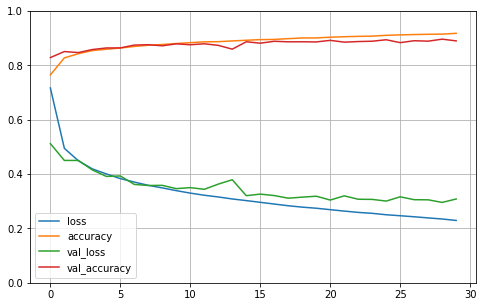

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

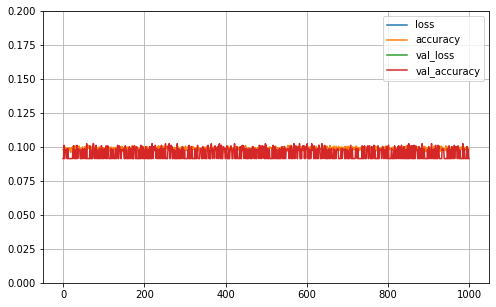

In [12]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.2)
plt.show()

정확도가 0.08 ~ 0.1 사이에서 진동하는 모습을 볼 수 있고, 학습하는 동안 손실(loss)의 값이 변하지 않음을 알 수 있었다. 

##결론

 

*   데이터 정규화는 모델을 학습시키는데 필요한 시간을 줄이는것에 큰 기여를 한다.
*   하지만, 정규화를 시키지 않은 데이터는 시간 요소 뿐만 아니라 알고리즘 정확도 측면에서 epoch 수를 아무리 늘려도 제대로된 학습이 어려울 수 있다.
*   손실(loss)이 일정 값으로 진행되는것으로 보아 가중치가 갱신되지 않는 것으로 파악된다.
*   데이터셋 정규화의 중요성에 대해서는 항상 인지하자.
 